In [3]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from pydmd import DMD
import warnings
warnings.filterwarnings('ignore')

In [2]:
name='Fluids/CYLINDER_ALL.mat'
data=loadmat(name)

In [33]:
nx = int(data['nx'][0,0])
ny = int(data['ny'][0,0])
U=np.zeros((nx,ny,151))
V=np.zeros((nx,ny,151))
VORT=np.zeros((nx,ny,151))
Snapshots=np.zeros((nx*ny,151))
for i in range(151):
    U[:,:,i] = data['UALL'][:,i].reshape(ny,nx).T
    V[:,:,i] = data['VALL'][:,i].reshape(ny,nx).T
    VORT[:,:,i] = data['VORTALL'][:,i].reshape(ny,nx).T
    Snapshots[:,i] = data['VORTALL'][:,i]
print(f"nx: {nx}" + '\n' + f"ny: {ny}")

nx: 199
ny: 449


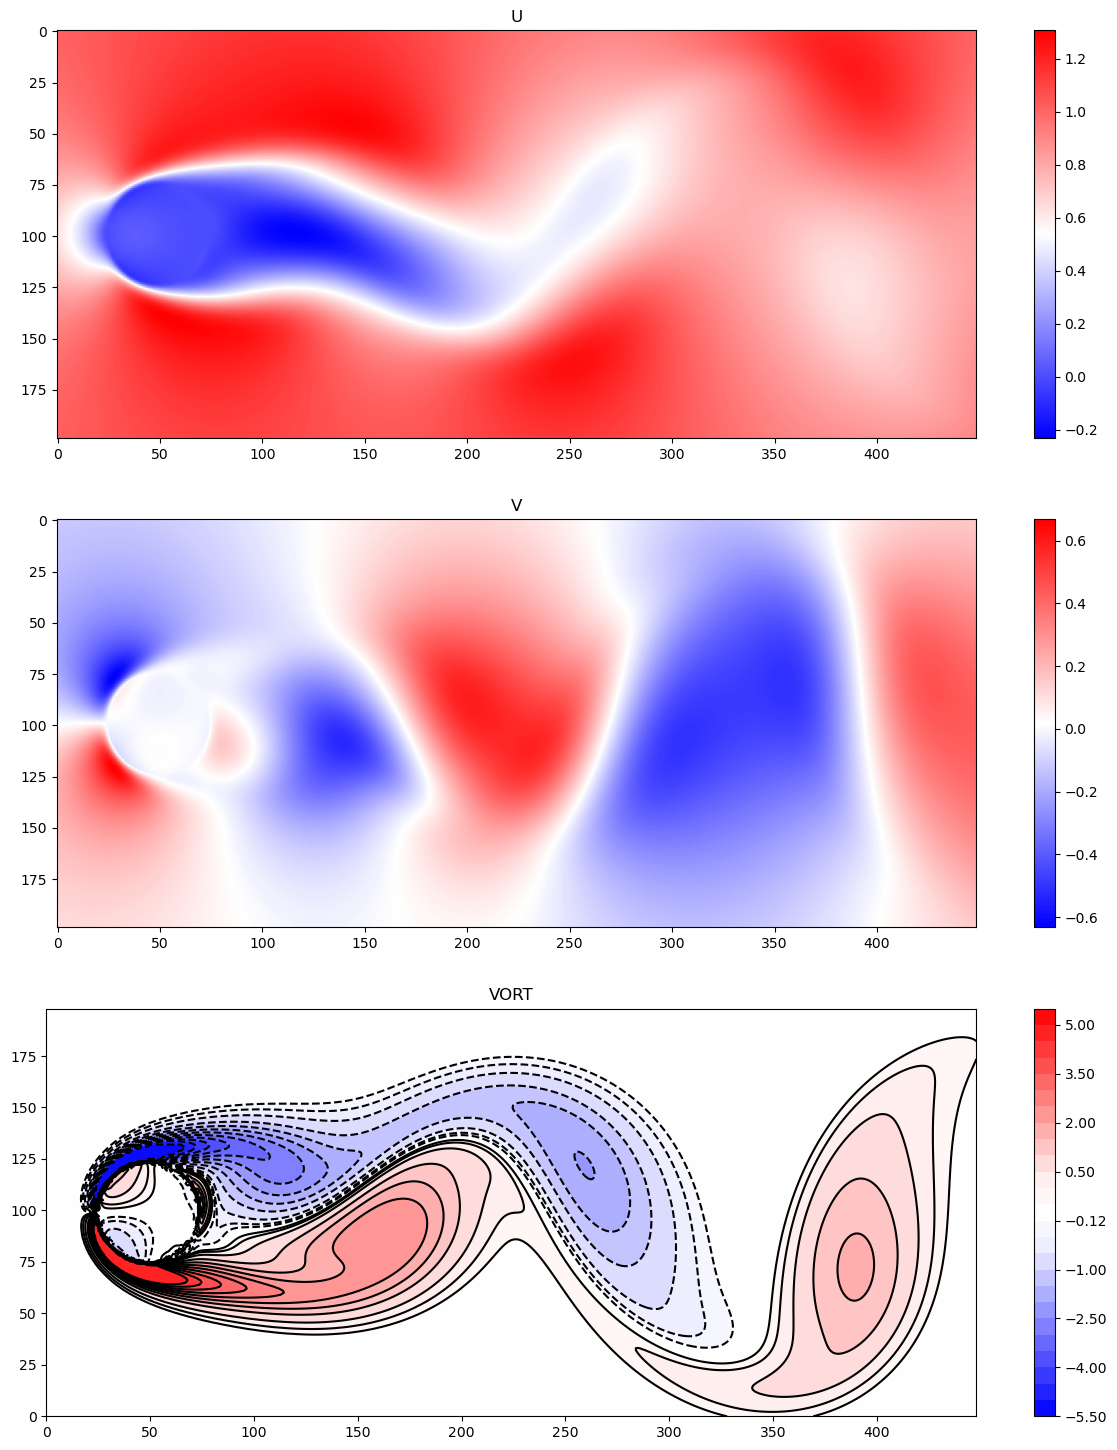

In [5]:
U_test = data['UEXTRA'].reshape(ny,nx).T
V_test = data['VEXTRA'].reshape(ny,nx).T
VORT_test = data['VORTEXTRA'].reshape(ny,nx).T
VORT_test[VORT_test > 5] = 5
VORT_test[VORT_test < -5] = -5

def plot_vort(VORT):
    levels=np.concatenate((np.linspace(-5.5,-0.5,11),np.array([-0.25,-0.125]),np.array([0.125,0.25]),np.linspace(.5,5.5,11)))
    plt.contourf(VORT,levels=levels, cmap='bwr')
    plt.title("VORT")
    plt.colorbar()
    plt.contour(VORT, levels=levels,colors='k')

plt.figure(figsize=(15,18))

plt.subplot(3,1,1)
plt.imshow(U_test,  cmap='bwr')
plt.title("U") 
plt.colorbar()

plt.subplot(3,1,2)
plt.imshow(V_test, cmap='bwr')
plt.title("V")
plt.colorbar()

plt.subplot(3,1,3)
plot_vort(VORT_test)

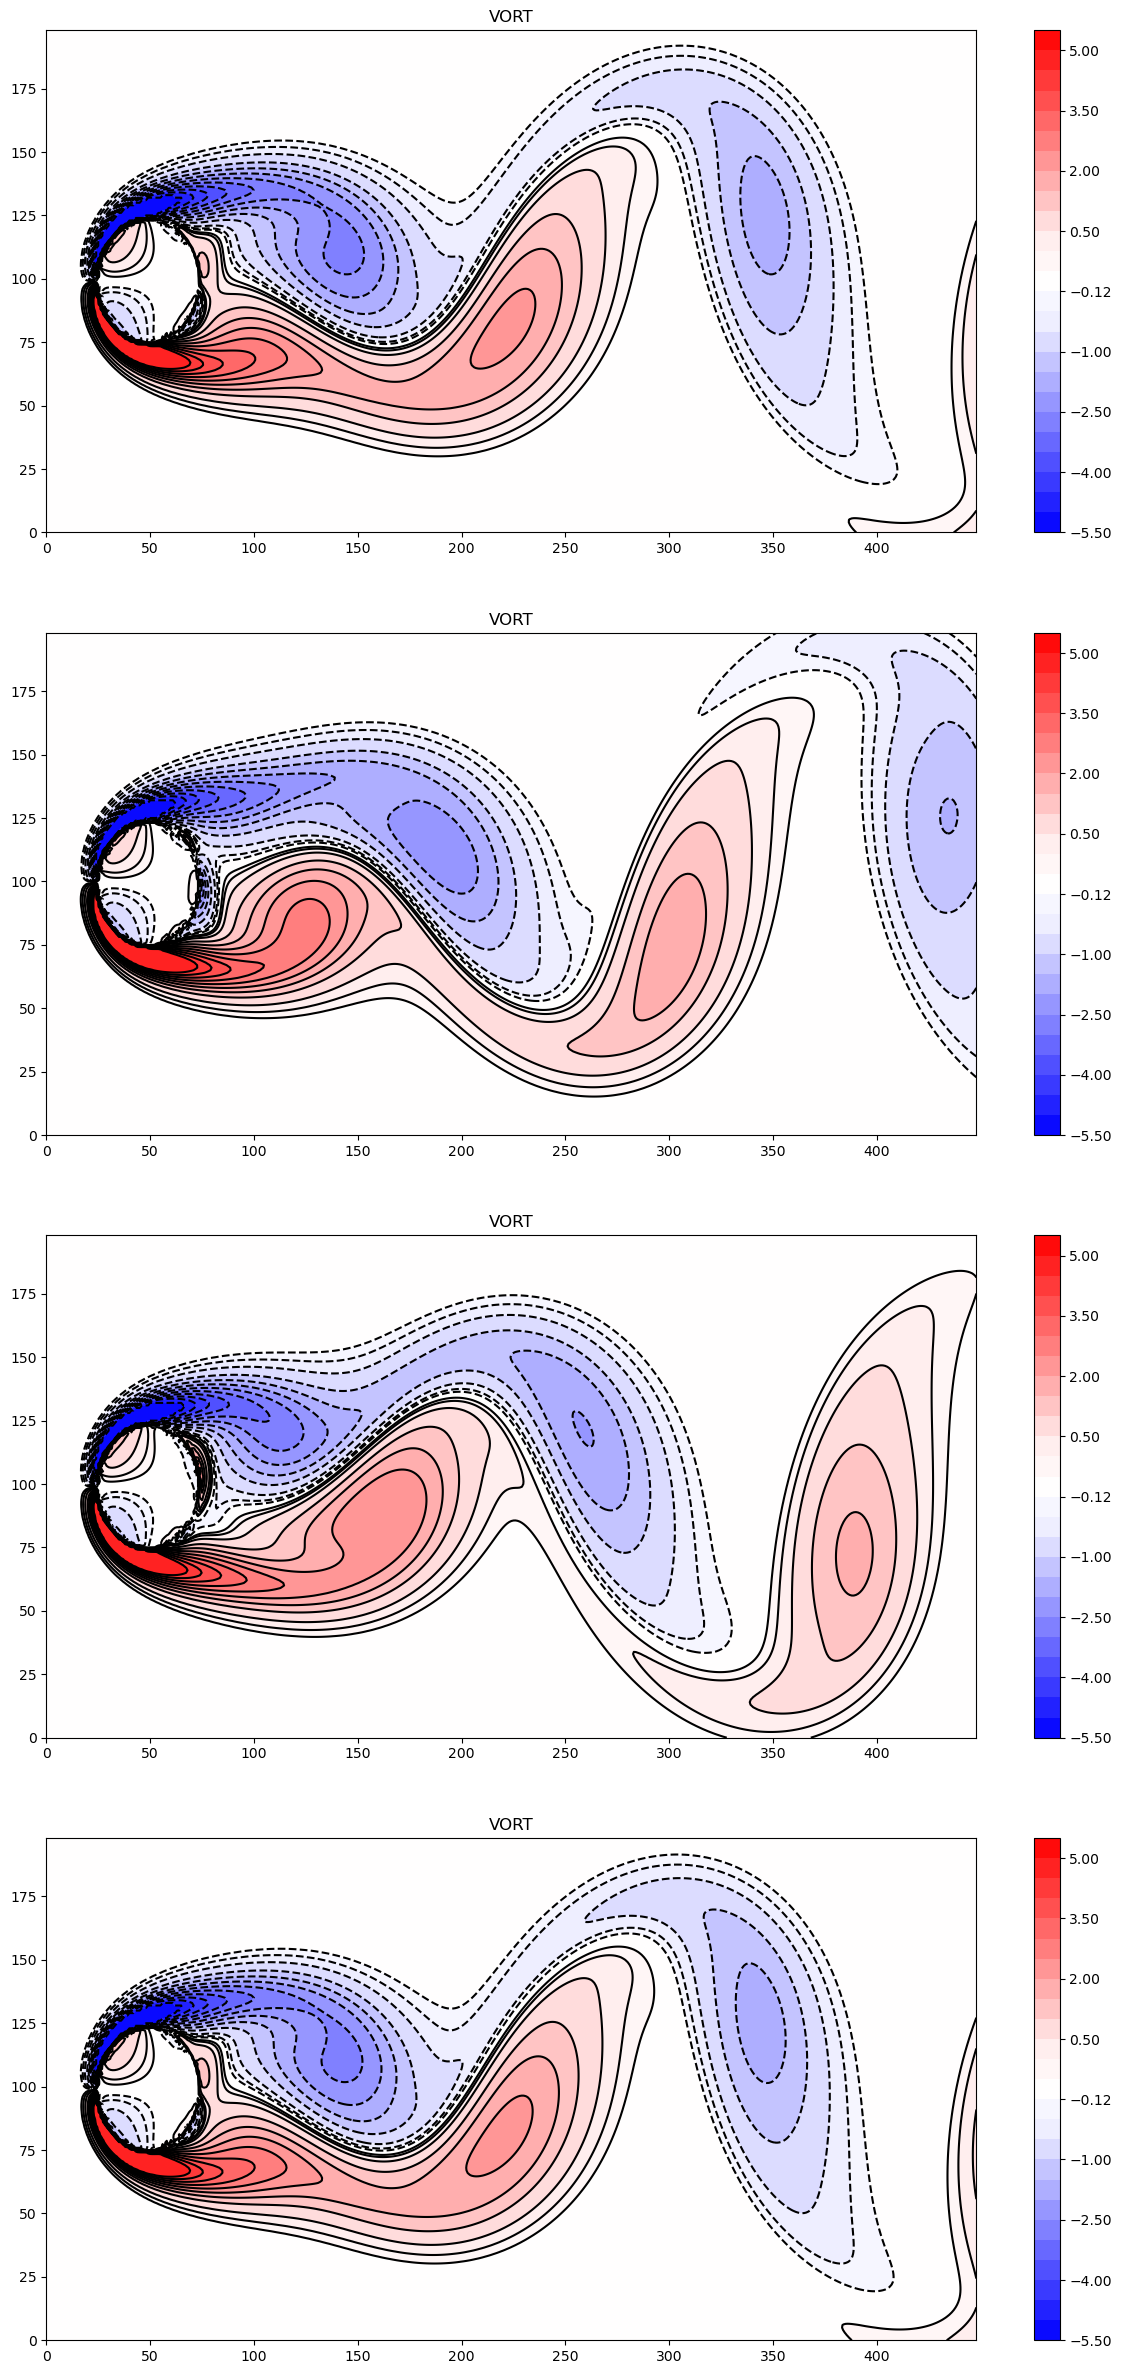

In [6]:
plt.figure(figsize=(15,30))
for i in range(1,5):
    VORT_test2 = VORT[:,:,i*10]
    VORT_test2[VORT_test2 > 5] = 5
    VORT_test2[VORT_test2 < -5] = -5
    plt.subplot(4,1,i)
    plot_vort(VORT_test2)

In [22]:
199*449

89351

In [30]:
Snapshots = VORT.reshape(199*449,151)
t=np.array(range(151))
print(Snapshots.shape)

(89351, 151)


[0.81170842+0.58393376j 0.81170842-0.58393376j 0.99999907+0.j
 0.67836639+0.j         0.91482876+0.40379638j 0.91482876-0.40379638j
 0.97847544+0.2063556j  0.97847544-0.2063556j ]
(449, 199, 151)


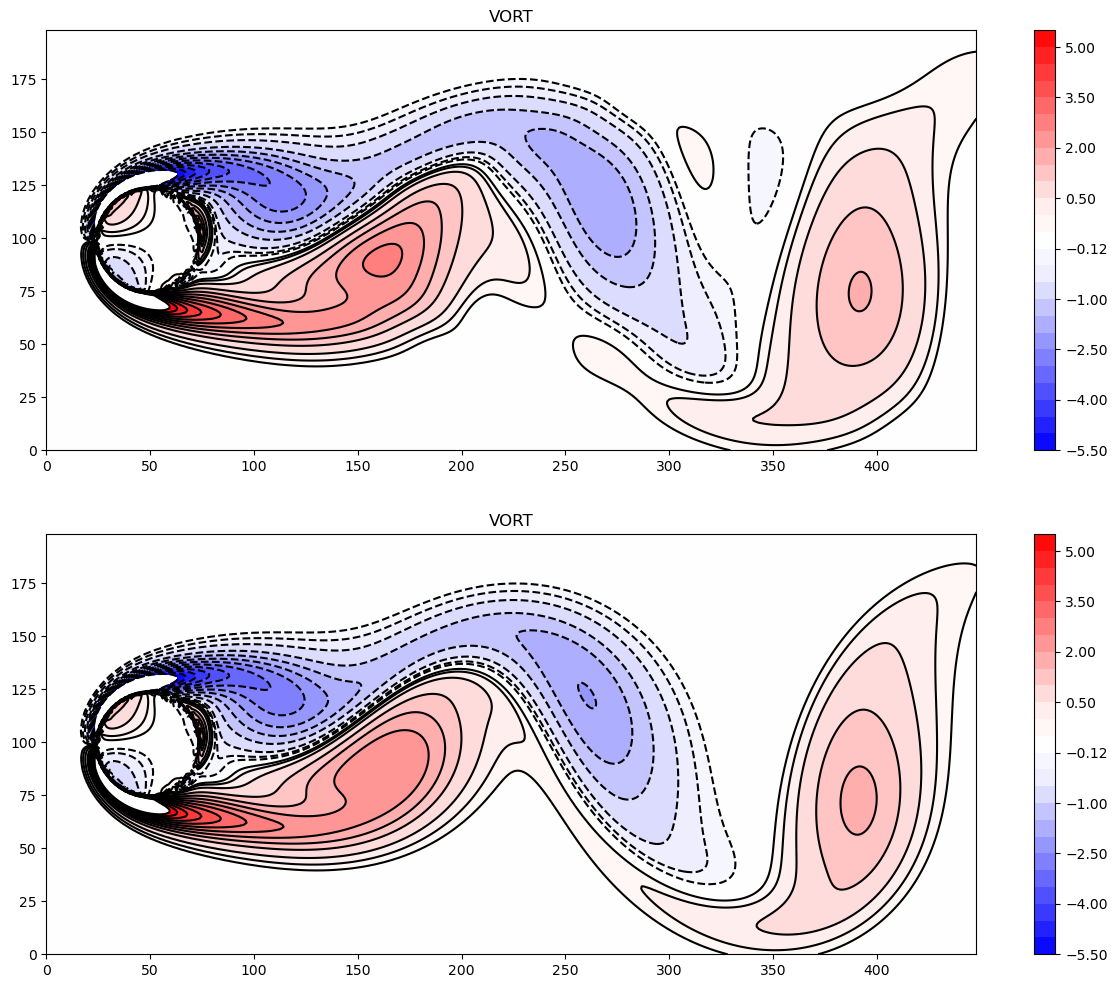

In [50]:
dmd = DMD(svd_rank=8)
dmd.fit(Snapshots)
print(dmd.eigs)
reconstruction = dmd.reconstructed_data.real.reshape(ny,nx,151)
print(reconstruction.shape)
plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
plot_vort(reconstruction[:,:,0].T)
plt.subplot(2,1,2)
plot_vort(VORT[:,:,0])